In [10]:
import pandas as pd
answers = pd.read_csv("./output/answers.csv")
specs = pd.read_csv("./output/model_specs.csv")
answers.model_name.unique()


array(['gemma-3', 'qwen-2.5', 'llama-3.2', 'gpt-oss', 'llama-4', 'qwen-3'],
      dtype=object)

,model,model_load_time,mean_answer_time,source,name
0,google/gemma-3-270m-it,6.189664,3.230769,local,gemma-3
1,Qwen/Qwen2.5-0.5B-Instruct,5.270252,7.615385,local,qwen-2.5
2,meta-llama/Llama-3.2-1B-Instruct,11.678398,26.692308,local,llama-3.2
3,gpt-oss-120b,NaN,5.307692,api,gpt-oss
4,llama-4-maverick-17b-128e-instruct,NaN,0.000000,api,llama-4
5,qwen-3-235b-a22b-instruct-2507,NaN,0.000000,api,qwen-3


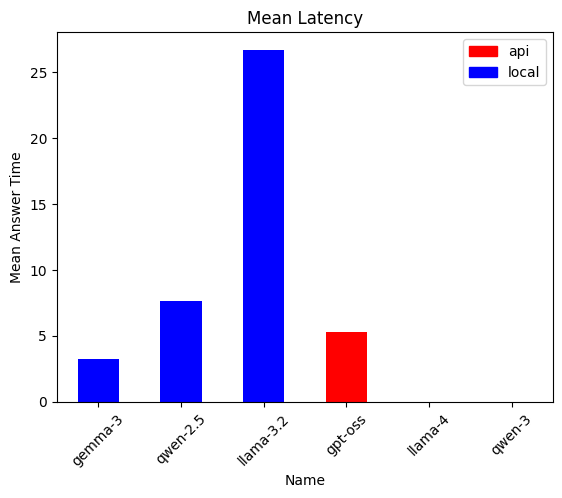

In [2]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
colors = {"api": 'r', "local": 'b'}
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = [i for i in colors]
specs.plot.bar(x="name", y="mean_answer_time", rot=45,ylabel="Mean Answer Time",xlabel="Name",title="Mean Latency",
               color=[colors[i] for i in specs['source']])
plt.legend(handles, labels)

specs


In [3]:
answers['answer_len'] = answers['answer'].apply(len)

In [4]:
answers.model_name.describe()

count          78
unique          6
top       gemma-3
freq           13
Name: model_name, dtype: object

Index(['gemma-3', 'gpt-oss', 'llama-3.2', 'llama-4', 'qwen-2.5', 'qwen-3'], dtype='object', name='model_name')


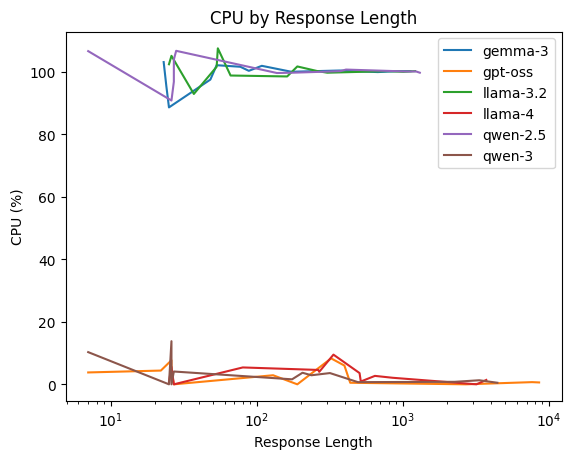

In [5]:
import matplotlib.pyplot as plt
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
cpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['cpu'].apply(list)
print(lens_by_model.keys())
for idx, val in enumerate(cpu_by_model.values):
    x1 = lens_by_model.values[idx]
    y1 = val
    plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("CPU (%)")
plt.title("CPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

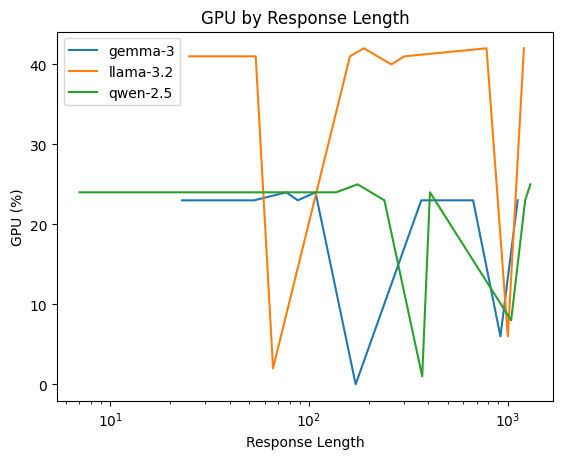

In [6]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
gpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['gpu'].apply(list)
for idx, val in enumerate(gpu_by_model.values):
    if gpu_by_model.keys()[idx] != "gpt-oss": # GPT-OSS was called first while the GPU was cooling down.

        if np.mean(val) >0:
            x1 = lens_by_model.values[idx]
            y1 = val
            plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("GPU (%)")
plt.title("GPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

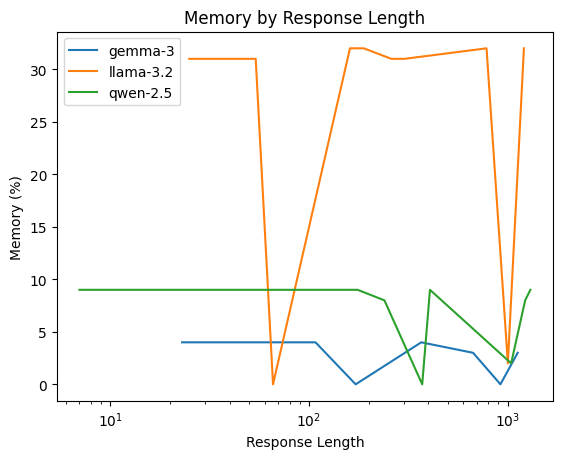

In [7]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
memory_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['memory'].apply(list)
for idx, val in enumerate(memory_by_model.values):
    if memory_by_model.keys()[idx] != "gpt-oss":
        if np.mean(val) >0:
            x1 = lens_by_model.values[idx]
            y1 = val
            plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Memory (%)")
plt.title("Memory by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

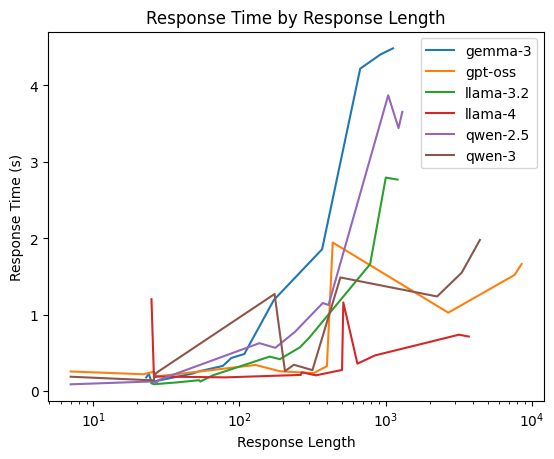

In [8]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
time_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['time'].apply(list)
for idx, val in enumerate(time_by_model.values):
    val_nums = [float(v) for v in val]
    if np.mean(val_nums) >0:
        x1 = lens_by_model.values[idx]
        y1 = val_nums
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Response Time (s)")
plt.title("Response Time by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()